In [86]:
import pandas as pd
combined_data = pd.read_csv('datasets/pre_processed_data.csv')

In [87]:
combined_data.shape

(48830, 13)

In [88]:
x = combined_data.drop(columns=['income'], axis=1)
y = combined_data['income']

In [89]:
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB
# gb = GaussianNB()
# best_ac =0
# best_rs = 0
# for i in range(0,10000):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
#     gb.fit(x_train,y_train)
#     y_pred = gb.predict(x_test)
#     ac = accuracy_score(y_test,y_pred)
#     if ac > best_ac :
#         best_ac = ac
#         best_rs = i
# 
# print(best_ac,best_rs)        

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=14915)  #Splitting the dataset into training and testing set 14915 8262 2778

In [91]:
#implementing Naïve Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [92]:
#Making predictions
y_pred = gb.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8139463444603727

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[7170,  314],
       [1503,  779]], dtype=int64)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7484
           1       0.71      0.34      0.46      2282

    accuracy                           0.81      9766
   macro avg       0.77      0.65      0.67      9766
weighted avg       0.80      0.81      0.79      9766


In [96]:
# from sklearn.ensemble import RandomForestClassifier
# 
# highest_ac = 0
# for i in range(0,4000):
#     rf  = RandomForestClassifier(n_estimators=100, random_state=i)
#     rf.fit(x_train,y_train)
#     y_rf_pred = rf.predict(x_test)
#     ac = accuracy_score(y_test,y_rf_pred)
#     
#     if ac > highest_ac:
#         highest_ac = ac
#         best_rf_rs = i
# print(highest_ac,best_rf_rs)        

In [97]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [98]:
y_rf_pred = rf.predict(x_test)
accuracy_score(y_test,y_rf_pred)

0.8627892688920745

In [99]:
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7484
           1       0.74      0.65      0.69      2282

    accuracy                           0.86      9766
   macro avg       0.82      0.79      0.80      9766
weighted avg       0.86      0.86      0.86      9766


In [100]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_rf_pred)

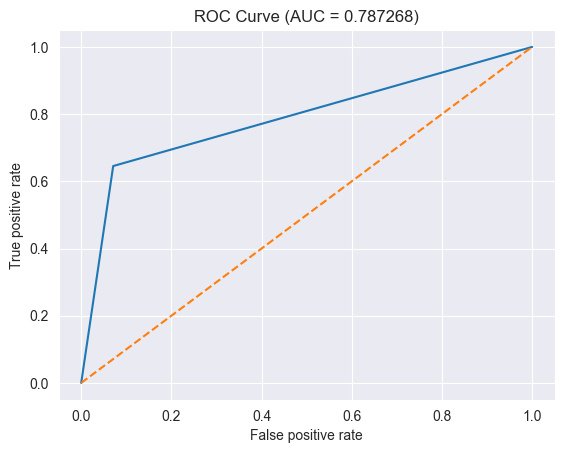

In [102]:
#ROC curve for random forest
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr,tpr,thresholds = roc_curve(y_test,y_rf_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve (AUC = {:2f})'.format(roc_auc))
plt.show()